In [ ]:
"""Тренировки по ML. Лекция 1: Вводная по ML + knn."""

[Тренировки по ML. Лекция 1: Вводная по ML + knn.](https://www.youtube.com/watch?v=k3UJOG-DKHE)

1. Introduction to Machine Learning, motivation
2. ML thesaurus and notation
3. Machine Learning problems overview
4. k Nearest Neighbours (kNN)
5. Maximum Likelihood Estimation
6. Naive Bayes classifier

#### 01 Introduction to Machine Learning, motivation

Человечество с давних времён занимается наукой о данных и извлечением знаний из массивов данных. Например, Иоганн Кеплер, который, опираясь на данные Тихо Браге о перемещениях звёзд, вывел три закона небесной механики.

#### 02 ML thesaurus and notation

**Обучение с учителем** (Supervised Learning) - обучение на размеченных данных.

**Выборка** (Data Set) - набор объектов.

**Объект** - наименьший элемент *выборки*, описанный в терминах некоторых *признаков*. Может быть строчкой в таблице, граф (молекулы), фотография, видео, запись голоса... Это может быть что угодно, что мы умеем обрабатывать.

**Признаки** (*фичи*, *свободные переменные*, *предикторы*) - то, в терминах чего мы описываем наши объекты. В случае таблички - это простые числовые или категориальные величины, записанные в столбцах.

**Категориальные переменные** - переменные, относящиеся к определённой категории данных и составляющие в совокупности конечное множество.

**Embedding** - информативное векторное представление данных. Для табличных данных можно сказать, каждый объект представлен некоторым вектором.

В случае с категориальными переменными можно использовать Dummy-кодирование: каждой категории соответствует  булева переменная, совокупность булевых переменных равна единице (то есть одна категория true, а остальные false)

**i.i.d.** (*independent, identically distributed*) - свойство данных - независимые и одинаково распределённые: считаем, что все объекты пришли из какого-то случайного распределения - порождены согласно какому-то законом - генератором данных. (Пример про млекопитающих из Южной Африки и белого медведя)

**Матрица объект-признак** (*матрица плана*, *design matrix*) - все объекты, описанные в терминах признаков.

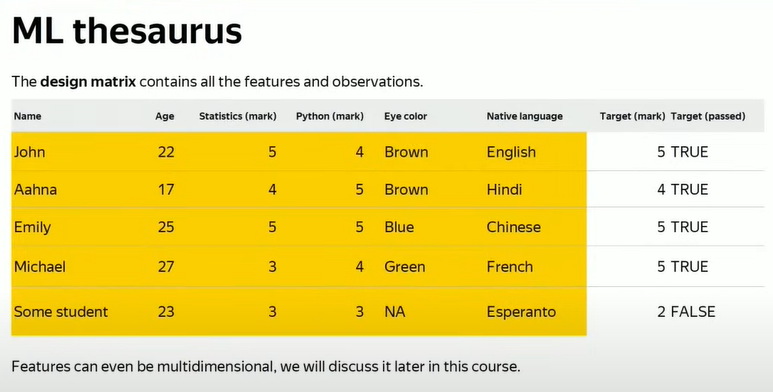

**Целевая переменная** (*target*) - числовая или категориальная переменная или даже вектор - ответ для объекта.

**Отображение** - получение ответов из объектов: как по истории студента предсказать его оценку по ML. Для отображения необходима *модель*.

**Модель** - сущность, которая объекты из признакового пространства отображает в целевое пространство, где находятся ответы.

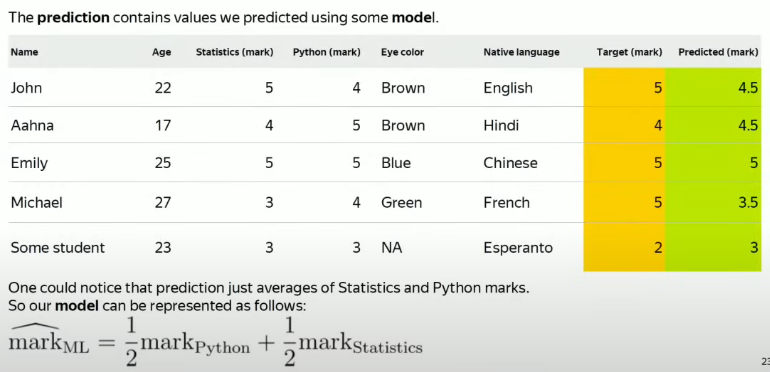

Формулируя эту модель, мы сделали априорные предположения на основании нашего внутреннего знания. Когда мы формулируем модель, заключаем в неё некую *гипотезу*.

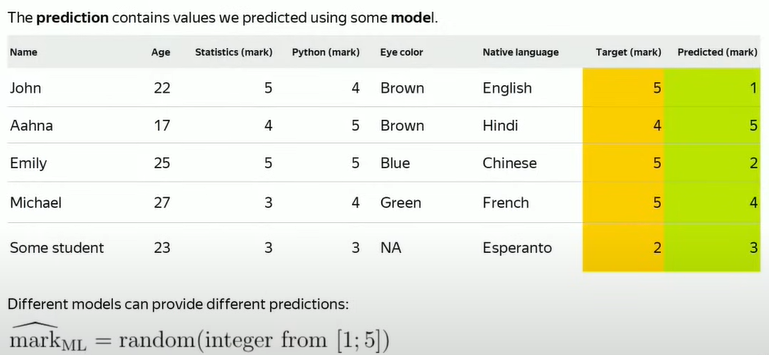

Здесь сделано другое предположение, что оценка по ML от данных не зависит.

Эти модели *не параметрические*, так как тут всё *прибито гвоздями*: коэффициенты заранее нами определены.

Чтобы понять, хорошо ли описывает модель обучающую выборку, нужен критерий - **функция потерь** та самая величина - функционал (функция, которая возвращает нам скалярную величину) - которая говорит нам, насколько всё плохо в случае функции потерь. Чем выше функция потерь, тем меньше нам нравится модель.

Функции потерь бывают разные. Например, для задачи регрессии это может быть среднее квадратичное отклонение:

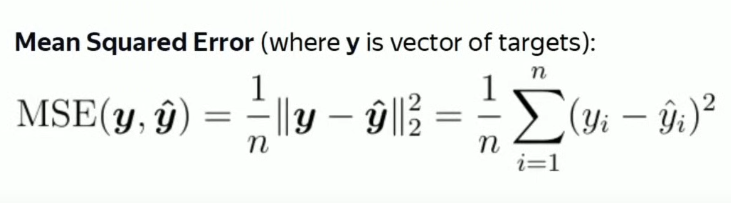

$y_{i}$ - ответ для i-го объекта

$\hat{y_i}$ - предсказание для i-го объекта

Также можно использовать среднюю абсолютную ошибку. Это то же самое, только по первой норме (она же *Манхеттенская норма* или *расстояние городских кварталов*).

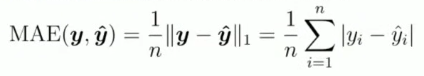

Вообще говоря, оценка модели - оценка предсказания модели.

Функционал эмпирического риска - среднее ошибка на выборке.

Когда есть функция потерь, можно сравнивать между собой модели. Например, предыдущие модели с моделью с взвешенной суммой:

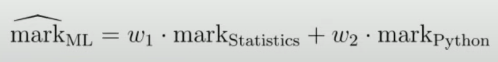

Будем искать такие $w_{1}$ и $w_{2}$, которые доставляют наименьшее значение функции потерь на заданной выборке.

Лучшего результата достигает взвешенная сумма, так как у неё есть степени свободы относительно среднего (модели, где были коэффициенты 1/2)

$w_{1}$ и $w_{2}$ - параметры нашей модели.

**Параметры** - то, что мы выбираем в ходе работы с нашей обучающей выборки.

**Гиперпараметры** - в данном случае, выбранные признаки (оценки по Python и статистике) и тип модели

Сначала мы выбираем *гиперпараметры*, а зате мдля заданных гиперпараметров выбираем оптимальные значения параметров на данной выборке.

#### 03 Machine Learning problems overview

Постановка задачи машинного обучения с учителем

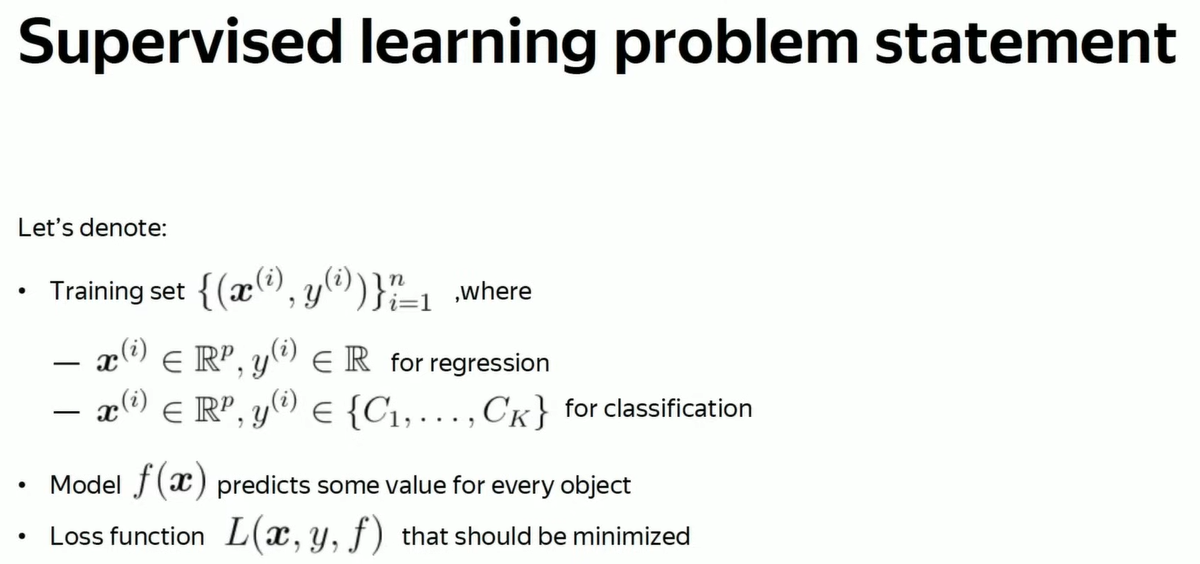

Есть выборка размером n, где каждый объект принадлежит p-мерному признаковому пространству (p различных признаков), а целевая переменная принимает либо численное значение из R, либо принимает значение из конечного множества $\{C_{1},...,C_{K}\}$, где K - количество классов. Также должна быть сформулирована некоторая функция потерь (или функционал ошибки) - то, что будет определять, какая модель лучше. И конечно, у нас должна быть задана модель или семейство моделей, из которых мы будем выбирать оптимальную.

Важно правильно подойти к постановке задачи:
1. Понять, как измерять качество - функция потерь.
2. Посмотреть на количество данных, которое доступно, или сумму их сбора.
3. Выбирать модель, которую будем использовать.

Практически любая задача машинного обучения - задача оптимизационная, так как мы оптимизируем какой-то функционал - устремляем его к минимуму, к максимуму или к какому-нибудь экстремуму в общем случае. Так что нужно понимать, что оптимизировать.

Две классические задачи обучения с учителем: задача *регрессии* и *линейная классификация*.

#### 04 k Nearest Neighbours (kNN)

K ближайших соседей. Очень полезная штука, если есть качественное векторное представление данных.

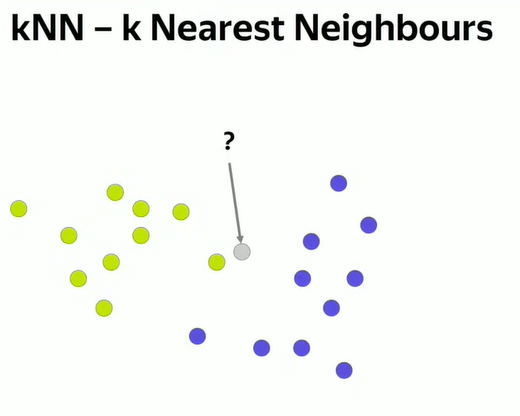

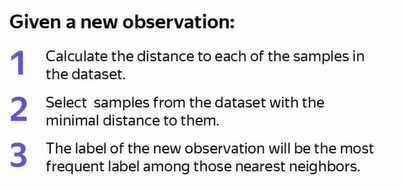

k является гиперпараметром, так как её мы выбираем заранее. Пока мы не выбрали k, мы не можем двигаться дальше.

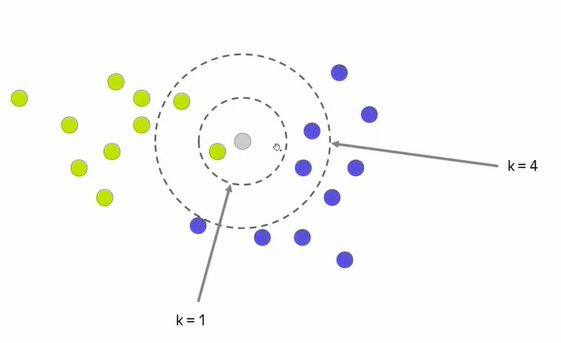

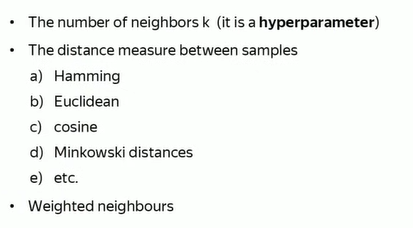

*Метрика* - также является гиперпараметром, так как мы выбираем её заранее.

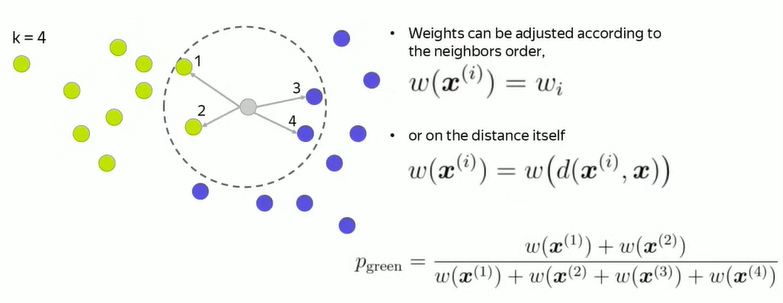

В классификации мы не метку класса предсказываем, а вероятностное распределение меток класса.

kNN простой, как палка и верёвка, при этом работает хорошо, но у него единственная проблема: он дорогой вычислительно, если большая выборка и мы неиспользуем никакие эвристики (например, осреднение групп точек).

Если признаки в разных шкалах, то расстояние будет учитывать большие признаки сильнее, чем маленькие. Поэтому необходимо нормировать данные, если не требуется обратное.

В kNN нет никакого обучения. Есть запоминание обучающей выборки и вычисление расстояний до объектов из обучающей выборки.

#### 05 Maximum Likelihood Estimation

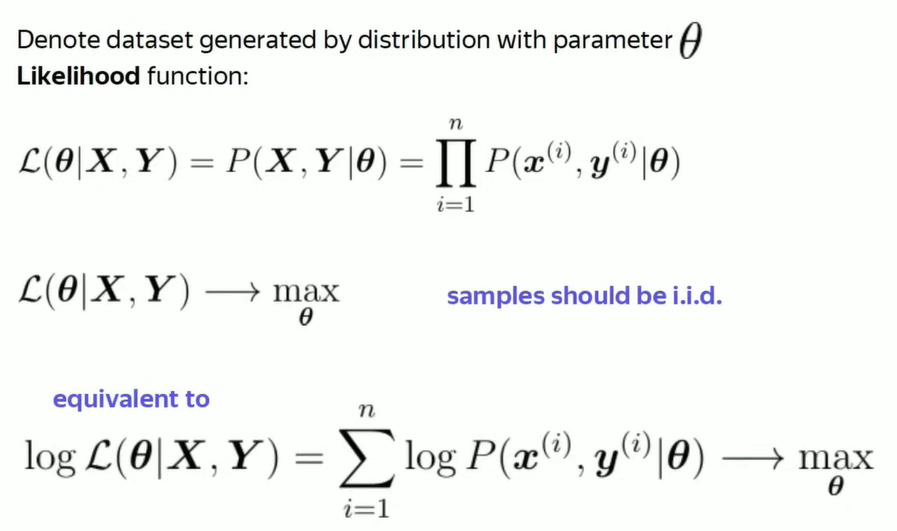

**Правдоподобие** - это вероятность пронаблюдать такую выборку при условии, что она была порождена распределением с заданными параметрами. Вероятность распределения данных при условии параметрах.

Факторизуем вероятность в произведение вероятностей, так как считаем, что данные у нас *iid*.

Задача - найти такие параметры, при которых правдоподобие данных будет максимальным. То есть найти такую $\theta$, для которой $L(\theta | X, Y)$ будет максимальной.

Произведение - не самый лучший вариант для максимизации, поэтому переходим к логарифму, так как argmax аргумента логарифма совпадает с argmax логарифма. Логарифм произведения - сумма логарифмов множителей, что удобно в вычислениях.

#### 06 Naive Bayes classifier

Наивный Баесовский классификатор предлагает нам запомнить только достаточные статистики для тех распределений, из которых, мы предполагаем, пришли наши признаки данных.

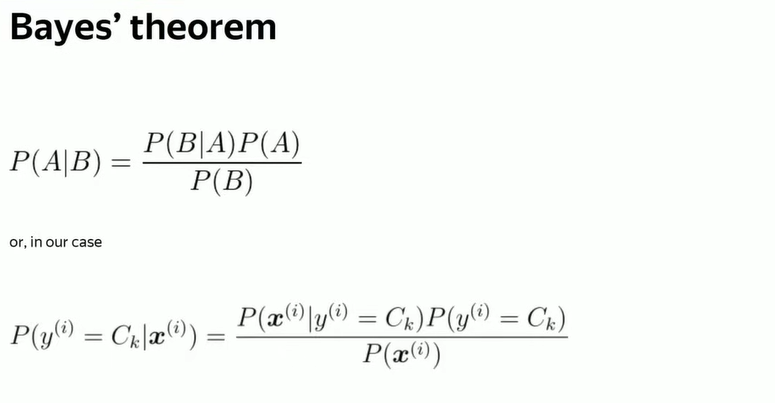

Вероятность того, что у i-го объекта класс k при условии того, что у него признаковое описание $x^{(i)}$ - это вероятность того, что мы пронаблюдаем объект $x^{(i)}$ при условии того, что он из k-го класса, умноженная на вероятность пронаблюдать объект из k-го класса (его частота в датасете), делённое на вероятность пронаблюдать i-ый объект независимо ни от чего.

Наивный Баесовский классификатор предполагает, что признаки при условии таргета независимы (объекты и так считаем по умолчанию *iid*). Таким образом, можно факторизовать вероятность на произведение вероятностей признаков при условии таргета.

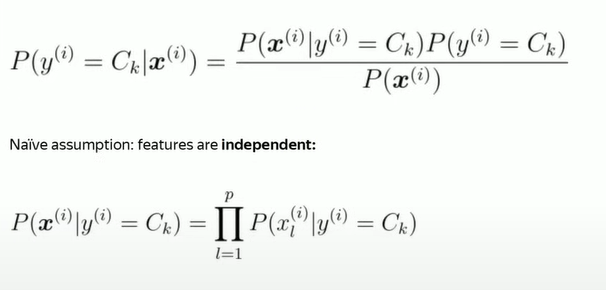

Перебираем все возможные классы для каждого объекта. Вероятность для первого класса у этого объекта - произведение вероятностей пронаблюдать такое значение у его первого признака, второго, и тд.

**Достаточные статистики** - это статистики, достаточные для однозначного определения вероятностного распределения.

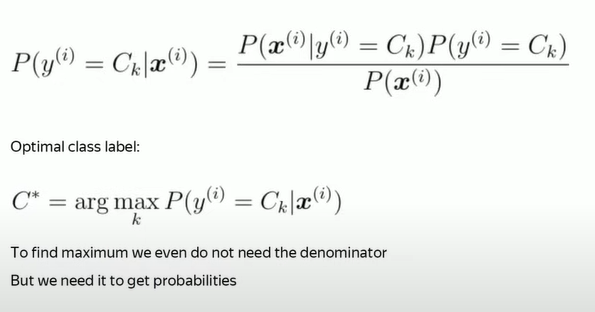
